<a href="https://colab.research.google.com/github/OldKiwi2904/NSLG-semiclassical-radiation/blob/main/NSLG_radiation_pub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
# Introducing governing expressions

# sigma stationary
def sigma_st(c, l_C, sigma_L, sigma0, sigma0_inv, dsigma0):
  return sigma0/sqrt(2)*sqrt(1 + (sigma_L*sigma0_inv)**4 + (dsigma0*
    sigma_L**2/(c*l_C)*sigma0_inv)**2)

# dispersion factor with quantum numbers n and l
def r_nl(sigma_st, n, l):
  return sigma_st*sqrt(2*n + abs(l) + 1)

# sin amplitude coefficient inside the dispersion function
def b(sigma_L, sigma_st_inv):
  return sqrt(1 - (sigma_L*sigma_st_inv)**4)

# radiated power, averaged over the cyclotron period (eV/s)
def P(c, q, omega, b_r_nl2):
  return (omega**3*q*b_r_nl2)**2/(40*c**5)*1e+12/1.6

# OAM decay rate, averaged over the cyclotron period
def dL(c, q, omega, b_r_nl2):
  return omega**5*(q*b_r_nl2)**2/(120*c**5)

# Transverse energy of the electron
def E(quant, n, l, sigma_st, inv_sigma_L):
  return quant/2*((2*n+abs(l)+1)*(sigma_st*inv_sigma_L)**2 + l)

In [ ]:
# Introducing variables

c = 3e+10 # speed of light (cm/s)
l_C = 2.426e-10/(2*pi) # reduced Compton wavelength (cm)
q = -4.8e-10 # electron charge (statC)
H = 1e+4 # solenoid magnetic field magnitude (G)
omega = q*H/(9.1e-28*c) # cyclotron frequency (angular) (rad/s)
n = 0 # radial quantum number
l = 10 # orbital quantum number
sigma_L = sqrt(2*c*1.054e-27/(abs(q)*H)) # dispersion of Landau level (cm)

#Scales
mm = 1e-1
um = 1e-4
nm = 1e-7
scales = {'nm':nm, r'$\mu$m': um, 'mm':mm}

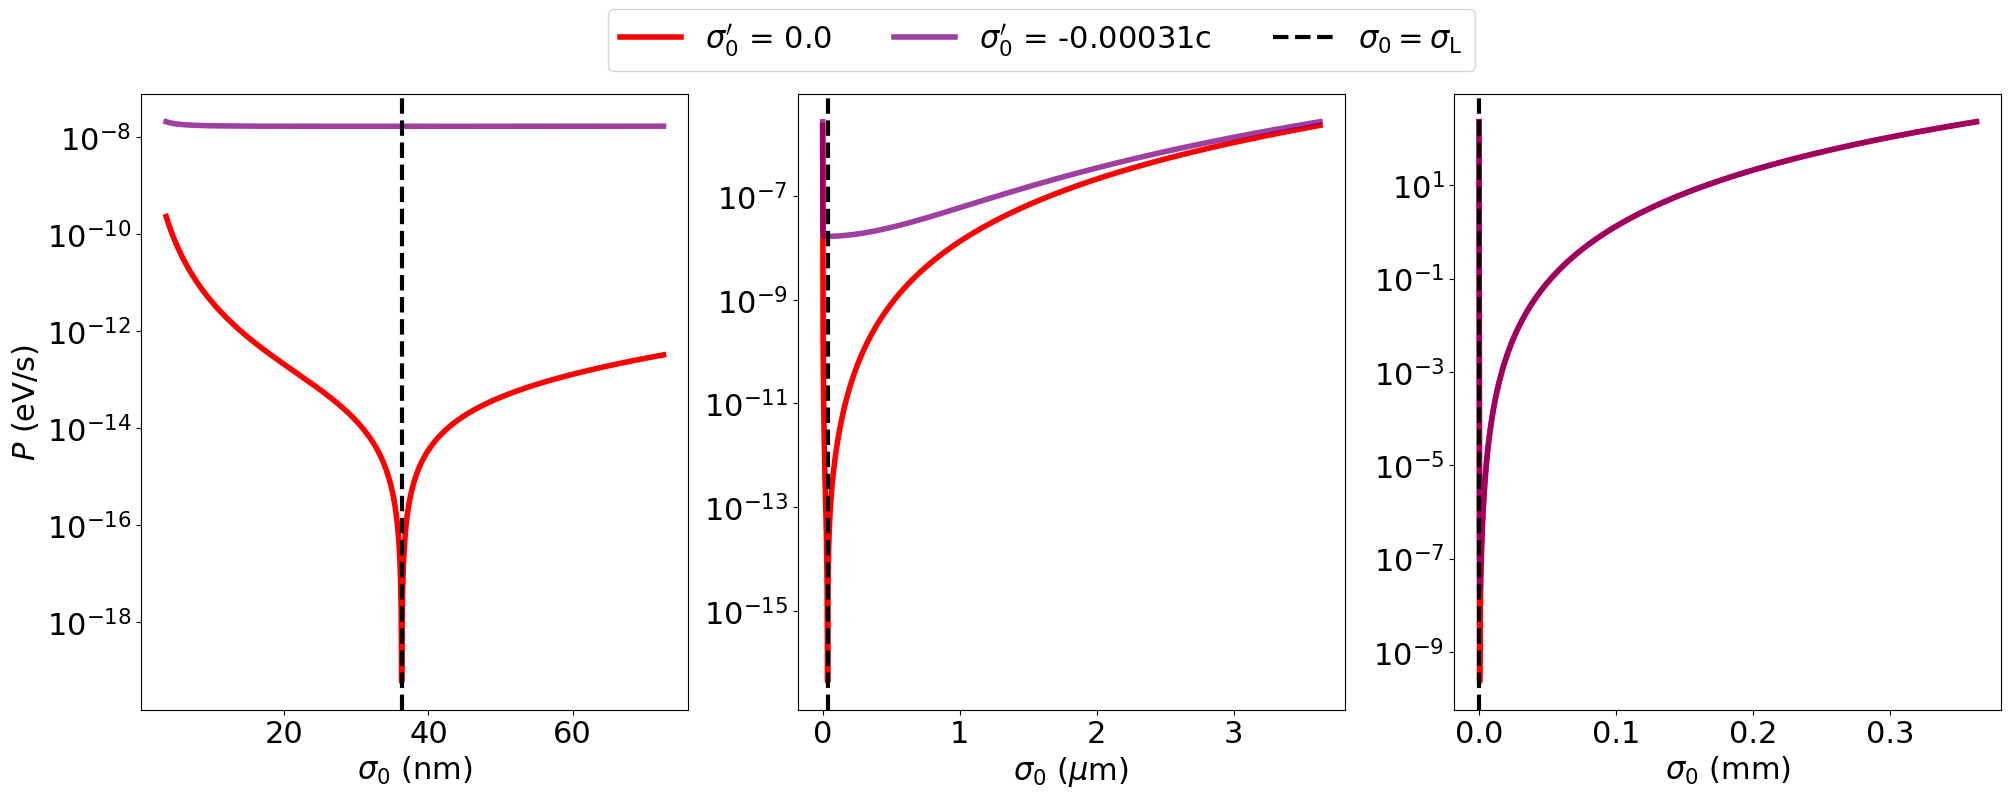

In [ ]:
# Radiated power plots for different scales of initial dispersion of the
# wavepacket

fig, ax = plt.subplots(1, 3, figsize=(24, 8))

cmap = LinearSegmentedColormap.from_list("red_to_blue", ["red", "blue"])

dsigma0 = [0.0, -3.1e-4*c]
scale_names = list(scales.keys())
scale_values = list(scales.values())
down_mult = [1e-1, 1e-2, 1e-4]
top_mult = [2, 100, 10000]

for s in range(len(scale_values)):
  sigma0 = linspace(sigma_L*down_mult[s], sigma_L*top_mult[s], 1000)
  sigma0_inv = reciprocal(sigma0.astype(float))
  sigma0_scaled = sigma0/scale_values[s]
  count = 0
  for i in dsigma0:
    true_sigma_st = sigma_st(c, l_C, sigma_L, sigma0_scaled*scale_values[s],
                             sigma0_inv, i)
    sigma_st_inv = reciprocal(true_sigma_st.astype(float))
    true_r_nl = r_nl(true_sigma_st, n, l)
    true_b = b(sigma_L, sigma_st_inv)
    b_r_nl2 = multiply(true_b, true_r_nl**2)
    true_P = P(c, q, omega, b_r_nl2)
    plt.rc('font', **{'size':'22'})
    norm_count = count / 2
    count += 1
    alpha = 1.0 - 0.5 * norm_count
    color = cmap(norm_count)
    if i == 0:
      ax[s].plot(sigma0_scaled, true_P, label=r'$\sigma_0^\prime$'+
                 ' = {}'.format(round(i/c, 5)), color=color, alpha=alpha,
                 linewidth=4.0)
    else:
      ax[s].plot(sigma0_scaled, true_P, label=r'$\sigma_0^\prime$'+
                 ' = {}'.format(round(i/c, 5)) + 'c', color=color, alpha=alpha,
                 linewidth=4.0)
  ax[s].tick_params(axis='both', labelsize=22)
  ax[s].set_yscale('log')
  ax[s].set_xlabel(r'$\sigma_0$' + ' ({})'.format(scale_names[s]), size=22)
  if s == 0:
    ax[s].set_ylabel(r'$P$ (eV/s)', size=22)
  ax[s].axvline(x=sigma_L/scale_values[s], color="black", linestyle='dashed',
                linewidth=3.0, label=r'$\sigma_0 = \sigma_\text{L}$')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.005),
           ncols = len(dsigma0)+1)

plt.show()
if s != len(scale_values)-1:
  plt.clf()

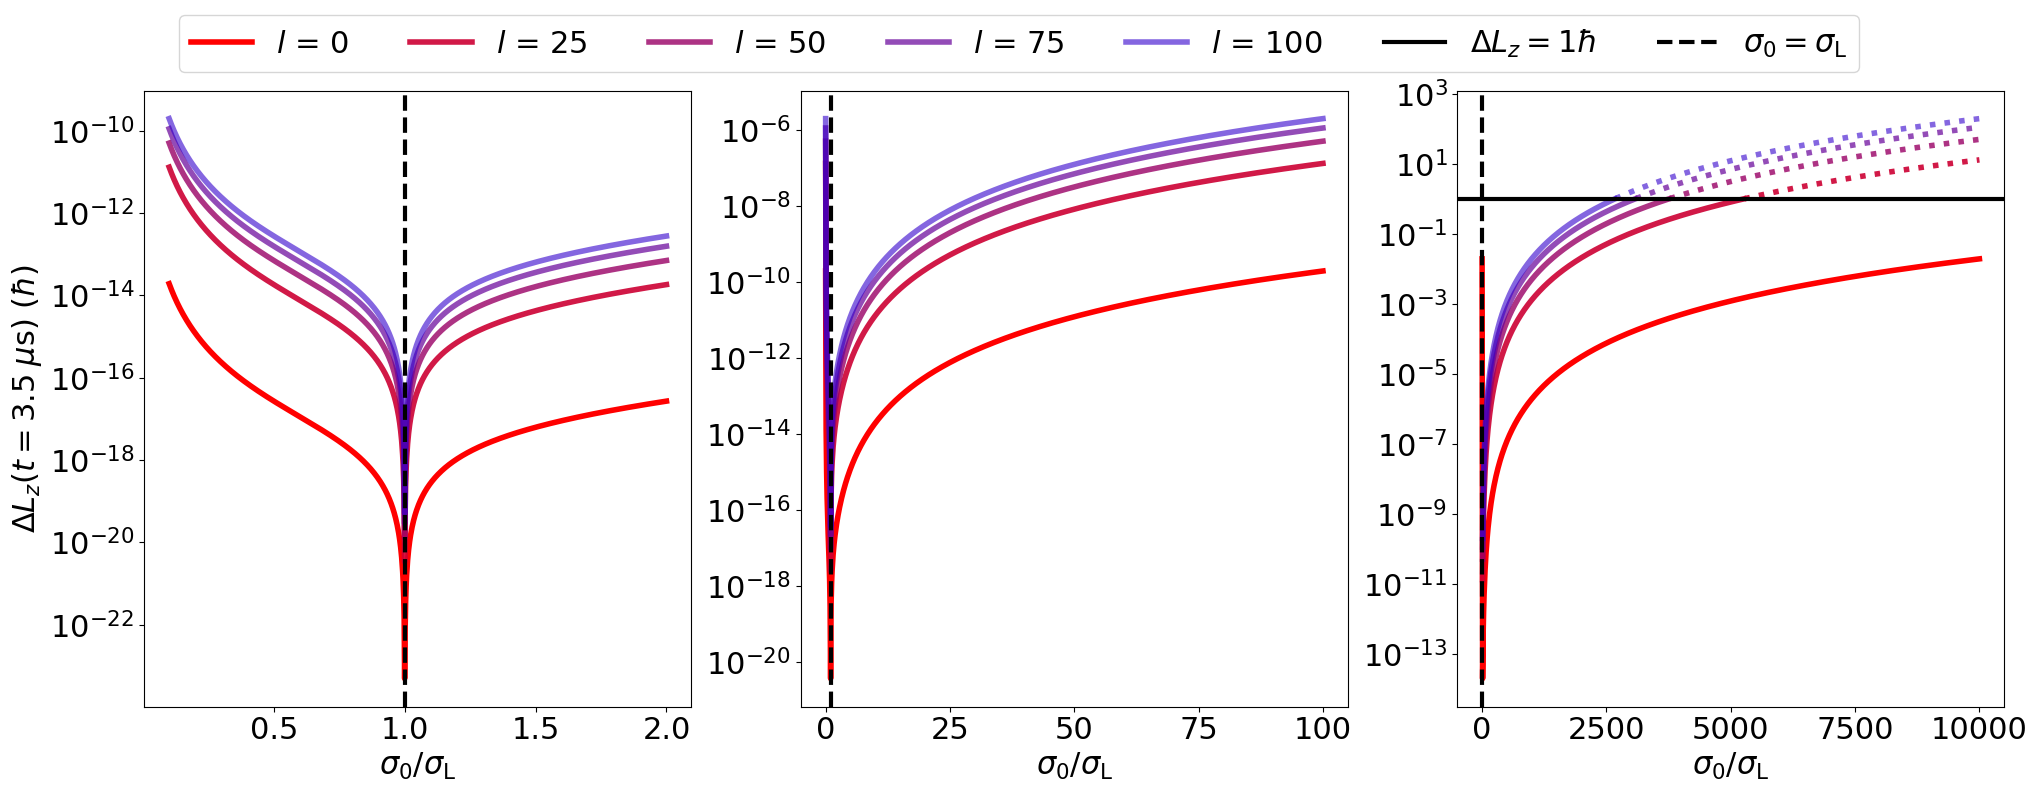

In [ ]:
# Plots of radiated OAM per the acceleration time t inside a linac for different
# scales of ratio between the initial dispersion of the wavepacket and the
# Landau level dispersion

fig, ax = plt.subplots(1, 3, figsize=(24, 8))

cmap = LinearSegmentedColormap.from_list("red_to_blue", ["red", "blue"])

dsigma0 = [0.0, -4.4e-4*0.7*c]
scale_names = list(scales.keys())
scale_values = list(scales.values())
down_mult = [1e-1, 1e-2, 1e-4]
top_mult = [2, 100, 10000]

for s in range(len(scale_values)):
  sigma0 = linspace(sigma_L*down_mult[s], sigma_L*top_mult[s], 1000)
  sigma0_inv = reciprocal(sigma0.astype(float))
  sigma0_scaled = sigma0/sigma_L

  for l in range(0, 125, 25):
    true_sigma_st = sigma_st(c, l_C, sigma_L, sigma0_scaled*sigma_L,
                             sigma0_inv, 0)
    sigma_st_inv = reciprocal(true_sigma_st.astype(float))
    true_r_nl = r_nl(true_sigma_st, n, l)
    true_b = b(sigma_L, sigma_st_inv)
    b_r_nl2 = multiply(true_b, true_r_nl**2)
    L = -dL(c, q, omega, b_r_nl2)/(1.054e-27)*3.5e-6
    norm_l = l / 125.0
    alpha = 1.0 - 0.5 * norm_l
    color = cmap(norm_l)
    plt.rc('font', **{'size':'22'})
    if len(np.where(L >= 1e+0)[0]) > 0:
      ax[s].plot(sigma0_scaled[np.where((L >= 1e+0) & (sigma0_scaled <= 1))[0]],
                 L[np.where((L >= 1e+0) & (sigma0_scaled <= 1))[0]], color=color,
                 alpha=alpha, linestyle='dotted', linewidth=4.0)
      ax[s].plot(sigma0_scaled[np.where(L < 1e+0)[0]], L[np.where(L < 1e+0)[0]],
                 label=r'$l$'+f' = {l}', color=color, alpha=alpha,
                 linewidth=4.0)
      ax[s].plot(sigma0_scaled[np.where((L >= 1e+0) & (sigma0_scaled > 1))[0]],
                 L[np.where((L >= 1e+0) & (sigma0_scaled > 1))[0]], color=color,
                 alpha=alpha, linestyle='dotted', linewidth=4.0)
      s0 = sigma0[np.where((L >= 1e+0) & (sigma0_scaled > 1))[0]]
      if l == 100:
        ax[s].axhline(y=1, color="black", linewidth=3.0,
                      label=r'$\Delta L_z = 1 \hbar$')
    else:
      ax[s].plot(sigma0_scaled, L, label=r'$l$'+f' = {l}', color=color,
                 alpha=alpha, linewidth=4.0)
  ax[s].tick_params(axis='both', labelsize=22)
  ax[s].set_xlabel(r'$\sigma_0/\sigma_\text{L}$', size=22)
  if s == 0:
    ax[s].set_ylabel(r'$\Delta L_z \left(t = 3.5 \; \mu\text{s}\right)$ ($\hbar$)', size=22)
  ax[s].set_yscale('log')
  ax[s].axvline(x=1, color="black", linestyle='dashed',
                linewidth=3.0, label=r'$\sigma_0 = \sigma_\text{L}$')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols = len(range(0, 125, 25))+2)

plt.show()
if s != len(scale_values)-1:
  plt.clf()

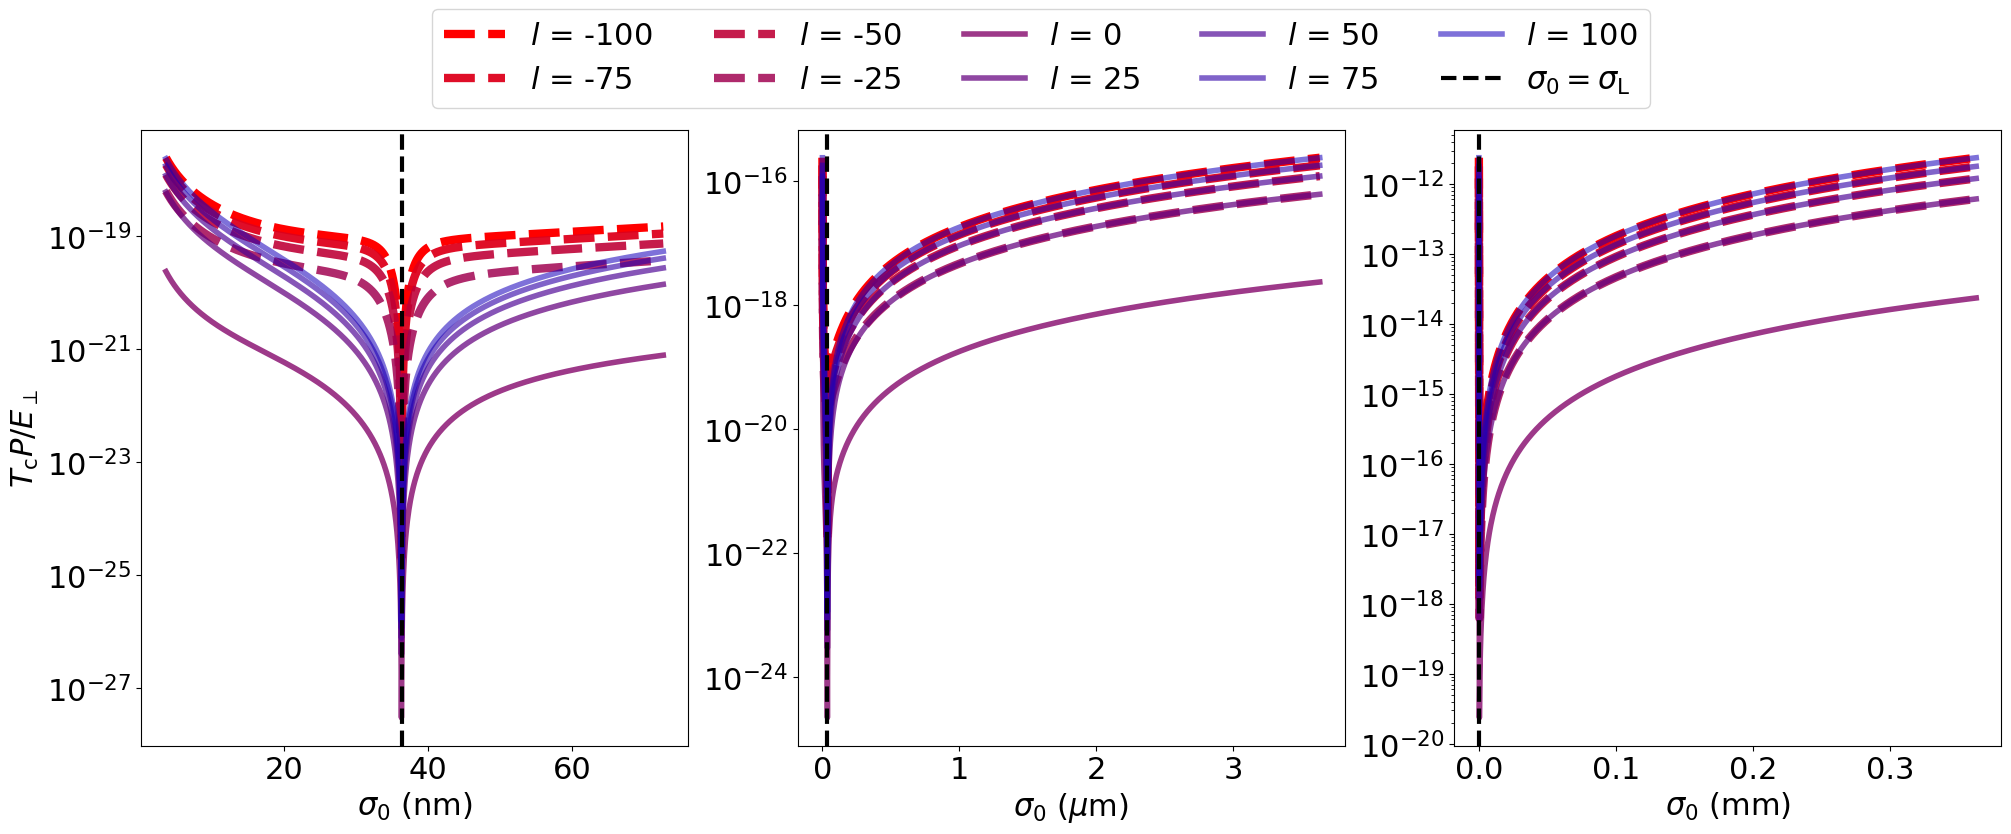

In [ ]:
# Plots of the ratio between the energy radiated per single cyclotron period to
# the transverse energy of the wavepacket for different scales of initial
# dispersion of the wavepacket

fig, ax = plt.subplots(1, 3, figsize=(24, 8))

cmap = LinearSegmentedColormap.from_list("red_to_blue", ["red", "blue"])

dsigma0 = [0.0, -4.4e-4*0.7*c]
scale_names = list(scales.keys())
scale_values = list(scales.values())
down_mult = [1e-1, 1e-2, 1e-4]
top_mult = [2, 100, 10000]

for s in range(len(scale_values)):
  sigma0 = linspace(sigma_L*down_mult[s], sigma_L*top_mult[s], 1000)
  sigma0_inv = reciprocal(sigma0.astype(float))
  sigma0_scaled = sigma0/scale_values[s]
  for l in range(-100, 125, 25):
    true_sigma_st = sigma_st(c, l_C, sigma_L, sigma0_scaled*scale_values[s],
                             sigma0_inv, 0)
    sigma_st_inv = reciprocal(true_sigma_st.astype(float))
    true_r_nl = r_nl(true_sigma_st, n, l)
    true_b = b(sigma_L, sigma_st_inv)
    b_r_nl2 = multiply(true_b, true_r_nl**2)
    true_P = P(c, q, omega, b_r_nl2)
    Energy = E(1.054e-27*omega, n, l, true_sigma_st, 1/sigma_L)
    Eps = Energy*1e+12/1.6
    norm_l = (l + 100) / 225.0
    color = cmap(norm_l)
    brightness = 1.0 - 0.2 * norm_l
    adjusted_color = [c * brightness for c in color[:3]]
    alpha = 1.0 - 0.5 * norm_l
    linestyle = 'dashed' if l < 0 else 'solid'
    linewidth = 6.0 if l < 0 else 4.0
    plt.rc('font', **{'size':'22'})
    ax[s].plot(sigma0_scaled, multiply(true_P*2*pi/omega,
                                       reciprocal(Eps.astype(float))),
               color=adjusted_color, alpha=alpha, linestyle=linestyle,
               label=r'$l$'+f' = {l}', linewidth=linewidth)
  ax[s].tick_params(axis='both', labelsize=22)
  ax[s].set_xlabel(r'$\sigma_0$' + ' ({})'.format(scale_names[s]), size=22)
  if s == 0:
    ax[s].set_ylabel(r'$T_{\text{c}} P / E_{\perp}$', size=22)
  ax[s].set_yscale('log')
  ax[s].axvline(x=sigma_L/scale_values[s], color="black", linestyle='dashed',
                linewidth=3.0, label=r'$\sigma_0 = \sigma_\text{L}$')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05),
           ncols = (len(range(-100, 125, 25))+1)/2)

plt.show()
if s != len(scale_values)-1:
  plt.clf()